# Sentiment Analysis

## Imports

In [1]:
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download(
    ["punkt", "stopwords"]
)

## Loading Data

In [2]:
df = pd.read_csv("data/raw.csv")

In [3]:
df.head()

,reviewText,Sentiment
0,This is a one of the best apps acording to a b...,Positive
1,This is a pretty good version of the game for ...,Positive
2,this is a really cool game. there are a bunch ...,Positive
3,"This is a silly game and can be frustrating, b...",Positive
4,This is a terrific game on any pad. Hrs of fun...,Positive


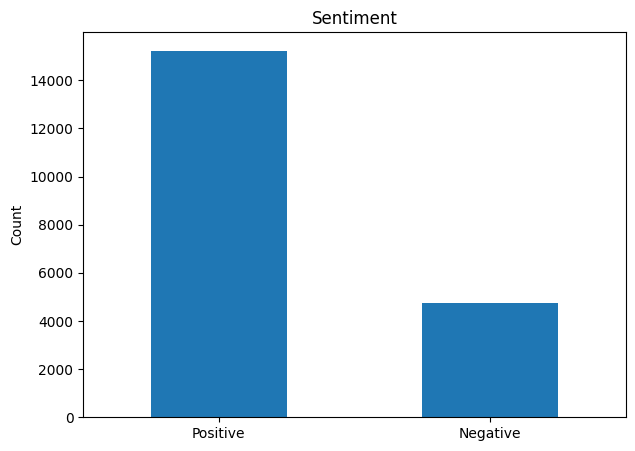

In [4]:
plt.figure(figsize = (7, 5))
df["Sentiment"].value_counts().plot.bar()
plt.title("Sentiment")
plt.xlabel("")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

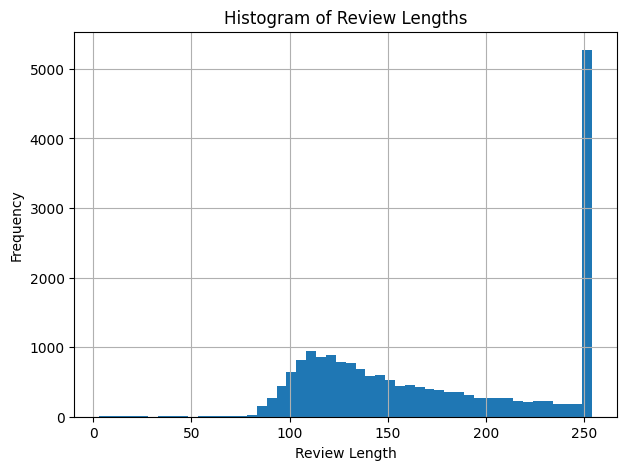

In [5]:
plt.figure(figsize = (7, 5))
df["length"] = df["reviewText"].apply(lambda x: len(x))
df["length"].hist(bins = 50)
plt.title("Histogram of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

## Data Preprocessing

### Numerical Normalization

In [6]:
df.loc[df["Sentiment"] == "Positive", "Sentiment"] = 1
df.loc[df["Sentiment"] == "Negative", "Sentiment"] = 0

In [9]:
df.sample(10, random_state = 1)

,reviewText,Sentiment,length
11456,"I hav nt found a real use for this app,perhaps...",0,176
16528,Either that or we just could not figure out ho...,0,254
3253,had to remove it because it confused me. The d...,0,123
18614,Agree with the other reviewers - unresponsive ...,0,145
1544,I love this app! Not only because I can now fo...,1,112
12568,I wanted something like alt/tab on my android ...,1,203
15497,"I am loving this app! UI is simple, functional...",1,254
13987,"We have downloaded several drawing apps, but t...",1,147
9598,"Currently, I am using it to keep my favorite g...",1,148
6668,this is a very useful app. we have used it suc...,1,217


### Splitting Data

In [10]:
x = df["reviewText"]
y = df["Sentiment"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    shuffle = True,
    random_state = 1
)

### Sentence Normalization

In [13]:
stemmer = nltk.stem.snowball.SnowballStemmer("english")
stopwords = nltk.corpus.stopwords.words("english")


In [14]:
def normalize (sentence):
    return " ".join(
        [
            stemmer.stem(token)
            for token in nltk.word_tokenize(sentence) if token not in stopwords and not set(token).issubset(string.punctuation + string.digits)
        ]
    )

In [15]:
x_train_cleaned = [
    normalize(sentence) for sentence in x_train
]
x_train_cleaned

['this app accur i love soo much i trust tell look forward total best horoscop app world',
 'i download free app day i like i differ time go time i use work differ project easi set use',
 "nice app i jote note n't worri look pen paper",
 'enjoy read horoscop everyday use app like three differ read give work great kindl fire',
 "i use app daili basi it 's easi use phone 's smaller screen also work great tablet",
 "this best app manger far one app sd task manag backup unistal cach cleaner amaz even mini add-on app compliment ad widget n't go",
 "i use dropbox well never enough storag especi kindl fire.they run special promot right day get upgrad gb storag lifetim fee do n't miss",
 'i play game month i still love see refer pun wish hero would listen though',
 'i download app wife buy android tablet christma she find quit intuit easi use epub file read well devic use app kobo devic struggl reason',
 'i tri sever calcul app phone i like one best has mani function simpl math applic allow qu

In [16]:
x_test_cleaned = [
    normalize(sentence) for sentence in x_test
]

### Sentence Vectorization

In [70]:
vectorizer = TfidfVectorizer(
    strip_accents = "unicode",
    analyzer = "word",
    ngram_range = (1, 2)
)
x_train_tfidf = vectorizer.fit_transform(x_train_cleaned)

In [71]:
x_test_tfidf = vectorizer.transform(x_test_cleaned)

In [72]:
pd.DataFrame.sparse.from_spmatrix(x_train_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,160868,160869,160870,160871,160872,160873,160874,160875,160876,160877
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Models

### Naive Bayes

#### Construction

#### Training

#### Evaluation

### Logistic Regression

#### Construction

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    random_state = 1,
    verbose = 1
)

#### Training

In [74]:
clf = lr.fit(
    x_train_tfidf,
    y_train.astype(int)
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       160879     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10904D+04    |proj g|=  4.18000D+03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     46     54      1     0     0   1.924D-03   5.181D+03
  F =   5180.7261588282008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


#### Evaluation

In [75]:
y_pred = clf.predict(x_test_tfidf)

In [18]:
print(
    classification_report(
        y_test.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.88      0.63      0.73       947
    Positive       0.89      0.97      0.93      3053

    accuracy                           0.89      4000
   macro avg       0.89      0.80      0.83      4000
weighted avg       0.89      0.89      0.89      4000



### K-Nearest Neighbors (KNN)

#### Construction

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors = 20
)

#### Training

In [20]:
clf = knn.fit(
    x_train_tfidf,
    y_train.astype(int)
)

#### Evaluation

In [21]:
y_pred = knn.predict(x_test_tfidf)

In [22]:
print(
    classification_report(
        y_test.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.80      0.62      0.70       947
    Positive       0.89      0.95      0.92      3053

    accuracy                           0.87      4000
   macro avg       0.84      0.78      0.81      4000
weighted avg       0.87      0.87      0.87      4000



### Support Vector Machine (SVM)

#### Construction

In [23]:
from sklearn import svm
svc = svm.SVC(
    random_state = 1,
    verbose = True
)

#### Training

In [24]:
clf = svc.fit(
    x_train_tfidf,
    y_train.astype(int)
)

[LibSVM]...........*....*
optimization finished, #iter = 15034
obj = -3590.095908, rho = 0.847704
nSV = 11209, nBSV = 2696
Total nSV = 11209


#### Evaluation

In [25]:
y_pred = clf.predict(x_test_tfidf)

In [26]:
print(
    classification_report(
        y_test.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.88      0.67      0.76       947
    Positive       0.90      0.97      0.94      3053

    accuracy                           0.90      4000
   macro avg       0.89      0.82      0.85      4000
weighted avg       0.90      0.90      0.90      4000



### Decision Tree

#### Construction

In [27]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(
    random_state = 1
)

#### Training

In [28]:
clf = dtc.fit(
    x_train_tfidf,
    y_train.astype(int)
)

#### Evaluation

In [29]:
y_pred = clf.predict(x_test_tfidf)

In [30]:
print(
    classification_report(
        y_test.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.60      0.67      0.63       947
    Positive       0.89      0.86      0.88      3053

    accuracy                           0.82      4000
   macro avg       0.75      0.76      0.75      4000
weighted avg       0.82      0.82      0.82      4000



### Random Forest

#### Construction

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    random_state = 1,
    verbose = 1
)

#### Training

In [32]:
clf = rfc.fit(
    x_train_tfidf,
    y_train.astype(int)
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.6s finished


#### Evaluation

In [33]:
y_pred = rfc.predict(x_test_tfidf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [34]:
print(
    classification_report(
        y_test.astype(int),
        y_pred,
        target_names = ["Negative", "Positive"]
    )
)

              precision    recall  f1-score   support

    Negative       0.90      0.54      0.67       947
    Positive       0.87      0.98      0.92      3053

    accuracy                           0.88      4000
   macro avg       0.89      0.76      0.80      4000
weighted avg       0.88      0.88      0.86      4000



### Artificial Neural Network (ANN)

#### Construction

#### Training

#### Evaluation

## Report